<a href="https://colab.research.google.com/github/arosha27/00-FundamentsOfPyTorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Neural Network classofication using PyTorch .

#Classification is a priblem of prediction whether something is one thing or another

#importing dependencies

import pandas as pd
import numpy as np
import torch
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Data

In [3]:
X, y = make_circles(n_samples= 1000,noise = 0.02,random_state = 42)
len(X) , len(y)

(1000, 1000)

In [4]:
X[:10] , y[:10]

(array([[ 0.76026594,  0.22387823],
        [-0.76722217,  0.1455425 ],
        [-0.80815854,  0.14894355],
        [-0.3760283 ,  0.70320906],
        [ 0.44051035, -0.89761737],
        [-0.48452681,  0.66063343],
        [-0.01244985,  0.80221142],
        [ 0.77745843,  0.1418763 ],
        [-0.16613755, -0.79026518],
        [-0.12692063,  1.01115984]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [5]:
Circles  = pd.DataFrame({"X1": X[:,0], "X2" : X[:,1] , "lable" : y[:]})
Circles.head(10)

,X1,X2,lable
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
5,-0.484527,0.660633,1
6,-0.012450,0.802211,1
7,0.777458,0.141876,1
8,-0.166138,-0.790265,1
9,-0.126921,1.011160,0


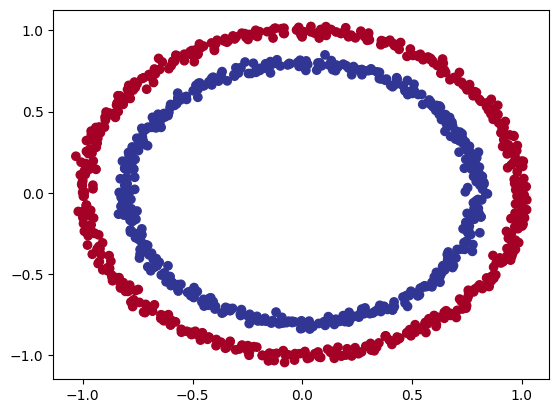

In [6]:
#exploring the circle datasets by visiualizing it
plt.scatter(Circles["X1"] , Circles["X2"] , c= y , cmap = plt.cm.RdYlBu);

Note: the data we are working with is often reffered to as toy dataset , a dataset that is samll enough to experiment but still sizeable enough to practice

1.1 Check input and output shapes

In [7]:
X.shape , y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.76026594,  0.22387823],
       [-0.76722217,  0.1455425 ],
       [-0.80815854,  0.14894355],
       ...,
       [-0.14123526, -0.80195115],
       [ 0.67509008, -0.75465723],
       [ 0.28237752,  0.96205688]])

In [9]:
#View the first example of features and labels

x_sample = X[0]
y_sample = y[0]

print(f"some X_sample value: {x_sample} and its y_label is : {y_sample}")
print(f" shape of some X_sample value: {x_sample.shape} and shape of y_sample_value is :{y_sample.shape}")

some X_sample value: [0.76026594 0.22387823] and its y_label is : 1
 shape of some X_sample value: (2,) and shape of y_sample_value is :()


1.2 Converting data into tensors
 - as the DataFrame provide us the values in arrays and we need to convert them into tensors to do the next processing

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
type(X) , X.dtype , y.dtype

(torch.Tensor, torch.float32, torch.float32)

1.3 Spliting the data into train/test split

In [12]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train ,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

len(x_train) ,  len(y_train) ,len(x_test), len(y_test)

(800, 800, 200, 200)

# 2. Building the Model

Lets's build our model to classify red and blue dots
To do so we need to do the following :
 - set up device agnoitic Code
 -construct a model_selection
 -define loss function and the optimizer
 -create training loop and testing loop

**2.1 Device agnoistic code**

In [13]:

import torch
from torch import nn

device =  "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
x_train

tensor([[ 0.6483, -0.4748],
        [ 0.6464, -0.7356],
        [-1.0020, -0.1328],
        ...,
        [ 0.0231, -1.0198],
        [ 1.0036,  0.1621],
        [ 0.5568, -0.5727]])

**2.2 model building**

In order to create a model , we need to ddo the following steps:
- create a class which is inhereted with the base class nn.Module
- create linear layers that automatically set the random parameters values using nn.Linear
- define a forward function to do the computations in forward manner forward()
- instantitiate thr model or class and send it to the target device

In [22]:
#creating a class inherited with nn.Module to build a model
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer0 = nn.Linear(in_features =2  , out_features = 5)
    self.linear_layer1 = nn.Linear(in_features = 5 , out_features = 1)

#defiining a forward method

  def forward(self , x):
    return self.linear_layer1(self.linear_layer0(x)) # x-> self.linear_layer0 -> self.linear_layer1

#instantitiate the class and setting the model to run on gpu

model_0 = CircleModelv0().to(device)

next(model_0.parameters()).device


device(type='cuda', index=0)